In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

data = data.reset_index()

data.head(2)

x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, 2])

#from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes = [0, 1, 2])


#split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


#Scale data

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


model = RandomForestClassifier(n_estimators=30, random_state=42)
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

#Make predictions

#y_pred = model.predict(x_test)

y_pred = model.predict_proba(x_test).argmax(axis=1)



# Print prediction metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0.9835600907029478
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1179
           1       0.99      0.98      0.98       420
           2       0.99      0.90      0.94       165

    accuracy                           0.98      1764
   macro avg       0.99      0.96      0.97      1764
weighted avg       0.98      0.98      0.98      1764

[[1176    1    2]
 [   9  411    0]
 [  14    3  148]]


Text(69.0, 0.5, 'Truth')

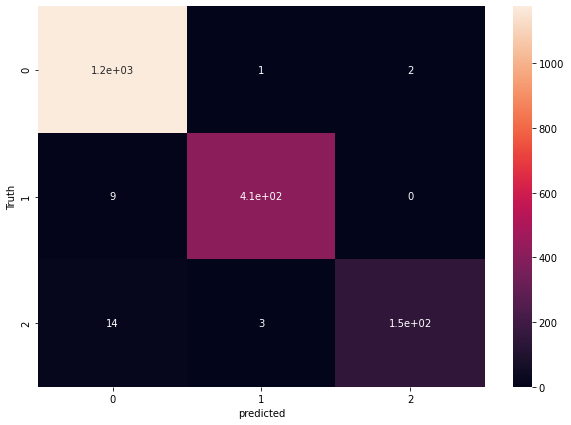

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ValueError: multiclass format is not supported

In [33]:
model_disp = plot_roc_curve(model, x_test, y_test)
plt.show()

ValueError: RandomForestClassifier should be a binary classifier